# Optimizing hyperparameters for DL models on the IDS2017 dataset

In this notebook, different DL models are used on the IDS2017 with hyperparameter optimization to test the performance. Deep neural networks, autoencoders, convolutional networks and RNNs are tested on the dataset.

In [1]:
from utils_ids2018 import load_ids2018, feature_selection
from notebook_utils import plot_confusion_matrix, metrics_report, calculate_metrics_by_label, test_metrics_DL, plot_overall_accuracy
from notebook_utils import test_metrics_AE
from sklearn.model_selection import train_test_split
import os
import pandas as pd
import numpy as np
%matplotlib inline
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

attack_labels = {
    0: 'Benign',
    1: 'Bot',
    2: 'Brute Force -Web',
    3: 'Brute Force -XSS',
    4: 'DDOS attack-HOIC',
    5: 'DDOS attack-LOIC-UDP',
    6: 'DDoS attacks-LOIC-HTTP',
    7: 'DoS attacks-GoldenEye',
    8: 'DoS attacks-Hulk',
    9: 'DoS attacks-SlowHTTPTest',
    10: 'DoS attacks-Slowloris',
    11: 'FTP-BruteForce',
    12: 'Infilteration',
    13: 'SQL Injection',
    14: 'SSH-Bruteforce'
}

## Load Dataset

In [2]:
df = load_ids2018()

Processed 1/10 files.
Processed 2/10 files.
Processed 3/10 files.
Processed 4/10 files.
Processed 5/10 files.
Processed 6/10 files.
Processed 7/10 files.
Processed 8/10 files.
Processed 9/10 files.
Processed 10/10 files.
Creating is_attack column...
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1623303 entries, 0 to 1623302
Data columns (total 81 columns):
 #   Column             Non-Null Count    Dtype   
---  ------             --------------    -----   
 0   dst_port           1623295 non-null  float64 
 1   protocol           1623295 non-null  float64 
 2   timestamp          0 non-null        float64 
 3   flow_duration      1623295 non-null  float64 
 4   tot_fwd_pkts       1623295 non-null  float64 
 5   tot_bwd_pkts       1623295 non-null  float64 
 6   totlen_fwd_pkts    1623295 non-null  float64 
 7   totlen_bwd_pkts    1623295 non-null  float64 
 8   fwd_pkt_len_max    1623295 non-null  float64 
 9   fwd_pkt_len_min    1623295 non-null  float64 
 10  fwd_pkt_len_mean   1

In [3]:
X = df.iloc[:, 0:78]
Y = df[["label", "is_attack", "label_code"]]

X.info()
Y.info()
print(Y.label.value_counts())

<class 'pandas.core.frame.DataFrame'>
Index: 1613825 entries, 0 to 1250804
Data columns (total 78 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   dst_port           1613825 non-null  float64
 1   protocol           1613825 non-null  float64
 2   flow_duration      1613825 non-null  float64
 3   tot_fwd_pkts       1613825 non-null  float64
 4   tot_bwd_pkts       1613825 non-null  float64
 5   totlen_fwd_pkts    1613825 non-null  float64
 6   totlen_bwd_pkts    1613825 non-null  float64
 7   fwd_pkt_len_max    1613825 non-null  float64
 8   fwd_pkt_len_min    1613825 non-null  float64
 9   fwd_pkt_len_mean   1613825 non-null  float64
 10  fwd_pkt_len_std    1613825 non-null  float64
 11  bwd_pkt_len_max    1613825 non-null  float64
 12  bwd_pkt_len_min    1613825 non-null  float64
 13  bwd_pkt_len_mean   1613825 non-null  float64
 14  bwd_pkt_len_std    1613825 non-null  float64
 15  flow_byts_s        1613825 non-null  

## Feature Selection

In [4]:
X = feature_selection(X, Y)

              Feature  Information Gain
1       flow_duration          0.232424
11        flow_pkts_s          0.228958
12      flow_iat_mean          0.227425
20         bwd_pkts_s          0.194746
27  init_fwd_win_byts          0.190584
6    fwd_pkt_len_mean          0.183832
4     fwd_pkt_len_max          0.183576
10        flow_byts_s          0.175337
9    bwd_pkt_len_mean          0.166702
7     bwd_pkt_len_max          0.141039
28  init_bwd_win_byts          0.106423
13        bwd_iat_tot          0.101347
16        bwd_iat_max          0.099338
14       bwd_iat_mean          0.099052
29   fwd_seg_size_min          0.097906
17        bwd_iat_min          0.084651
15        bwd_iat_std          0.080364
8     bwd_pkt_len_min          0.073261
5     fwd_pkt_len_min          0.073215
0            protocol          0.062239
2        tot_fwd_pkts          0.059033
3        tot_bwd_pkts          0.049594
32           idle_min          0.041709
30        active_mean          0.025350


## Split Dataset

The dataset is split into a training set and a testing set with a ratio of 0.8/0.2. The dataset is stratified according to the label to have an equal representation of all classes in the 2 subsets.

In [5]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y.label_code)

In [6]:
Y_train.label.value_counts()

label
Benign                      1070878
DDOS attack-HOIC              55054
DDoS attacks-LOIC-HTTP        46142
DoS attacks-Hulk              37046
Bot                           23007
FTP-BruteForce                15517
SSH-Bruteforce                15007
Infilteration                 12762
DoS attacks-SlowHTTPTest      11223
DoS attacks-GoldenEye          3372
DoS attacks-Slowloris           844
DDOS attack-LOIC-UDP            134
Brute Force -Web                 42
Brute Force -XSS                 22
SQL Injection                    10
Label                             0
Name: count, dtype: int64

In [7]:
Y_test.label.value_counts()

label
Benign                      267720
DDOS attack-HOIC             13763
DDoS attacks-LOIC-HTTP       11536
DoS attacks-Hulk              9261
Bot                           5752
FTP-BruteForce                3879
SSH-Bruteforce                3752
Infilteration                 3190
DoS attacks-SlowHTTPTest      2806
DoS attacks-GoldenEye          843
DoS attacks-Slowloris          211
DDOS attack-LOIC-UDP            34
Brute Force -Web                11
Brute Force -XSS                 5
SQL Injection                    2
Label                            0
Name: count, dtype: int64

In [8]:
benign_percentage = len(Y_train.label[Y_train["label"]=="BENIGN"])/len(Y_train)
print('Percentage of benign samples: %.4f' % benign_percentage)
print(Y_train.is_attack.value_counts())

Percentage of benign samples: 0.0000
is_attack
0    1070878
1     220182
Name: count, dtype: int64


## Smote Resampling

In [9]:
from imblearn.over_sampling import SMOTE

def resample_dataset(X, Y, min_samples, attack_labels):
    Y = Y.drop(columns=['label'])
    combined = pd.concat([X, Y], axis=1)
    counts = Y['label_code'].value_counts()
    samples_number = {i: max(counts[i], min_samples) for i in np.unique(Y['label_code'])}
    combined_array = combined.values
    y_array = Y['label_code'].values
    resampler = SMOTE(random_state=42, sampling_strategy=samples_number)
    resampled_array, y_resampled = resampler.fit_resample(combined_array, y_array)
    X_resampled = resampled_array[:, :-Y.shape[1]]
    Y_resampled = resampled_array[:, -Y.shape[1]:]
    X_resampled_df = pd.DataFrame(X_resampled, columns=X.columns)
    Y_resampled_df = pd.DataFrame(Y_resampled, columns=Y.columns)
    Y_resampled_df['label'] = Y_resampled_df['label_code'].map(attack_labels)
    Y_resampled_df['label'] = Y_resampled_df['label'].astype('category')
    return X_resampled_df, Y_resampled_df

X_smote_train, Y_smote_train = resample_dataset(X_train, Y_train, 100000, attack_labels)


In [10]:
Y_smote_train.label.value_counts()

label
Benign                      1070878
Bot                          100000
Brute Force -Web             100000
Brute Force -XSS             100000
DDOS attack-HOIC             100000
DDOS attack-LOIC-UDP         100000
DDoS attacks-LOIC-HTTP       100000
DoS attacks-GoldenEye        100000
DoS attacks-Hulk             100000
DoS attacks-SlowHTTPTest     100000
DoS attacks-Slowloris        100000
FTP-BruteForce               100000
Infilteration                100000
SSH-Bruteforce               100000
Name: count, dtype: int64

In [11]:
from sklearn.preprocessing import StandardScaler

scaler_smote = StandardScaler()
scaler_smote.fit(X_smote_train)

StandardScaler()

In [12]:
# Save the model
def save_model(model, model_name):
    # Create directory if it does not exist
    model_dir = os.path.join("models", "DL_models_optimized_2018")
    os.makedirs(model_dir, exist_ok=True)
    # Save the model
    model.save(os.path.join(model_dir, f"{model_name}.keras"))

metrics = {}

## Optimized DNN

Reloading Tuner from optimization_2018\DNN_combined_fixed_dropout\tuner0.json
The optimal hyperparameters are: {'num_layers': 3, 'dropout': 0.1, 'learning_rate': 0.0001, 'tuner/epochs': 20, 'tuner/initial_epoch': 7, 'tuner/bracket': 2, 'tuner/round': 2, 'tuner/trial_id': '0014'}
Epoch 1/50
61772/61772 ━━━━━━━━━━━━━━━━━━━━ 45s 716us/step - accuracy: 0.9256 - loss: 0.1975 - val_accuracy: 0.5346 - val_loss: 1.6346
Epoch 2/50
61772/61772 ━━━━━━━━━━━━━━━━━━━━ 45s 720us/step - accuracy: 0.9735 - loss: 0.0913 - val_accuracy: 0.5292 - val_loss: 1.6205
Epoch 3/50
61772/61772 ━━━━━━━━━━━━━━━━━━━━ 45s 720us/step - accuracy: 0.9773 - loss: 0.0798 - val_accuracy: 0.5828 - val_loss: 1.6250
Epoch 4/50
61772/61772 ━━━━━━━━━━━━━━━━━━━━ 46s 737us/step - accuracy: 0.9801 - loss: 0.0722 - val_accuracy: 0.5722 - val_loss: 1.6750
Epoch 5/50
61772/61772 ━━━━━━━━━━━━━━━━━━━━ 44s 713us/step - accuracy: 0.9807 - loss: 0.0705 - val_accuracy: 0.5799 - val_loss: 1.5613
Epoch 6/50
61772/61772 ━━━━━━━━━━━━━━━━━━━━ 4

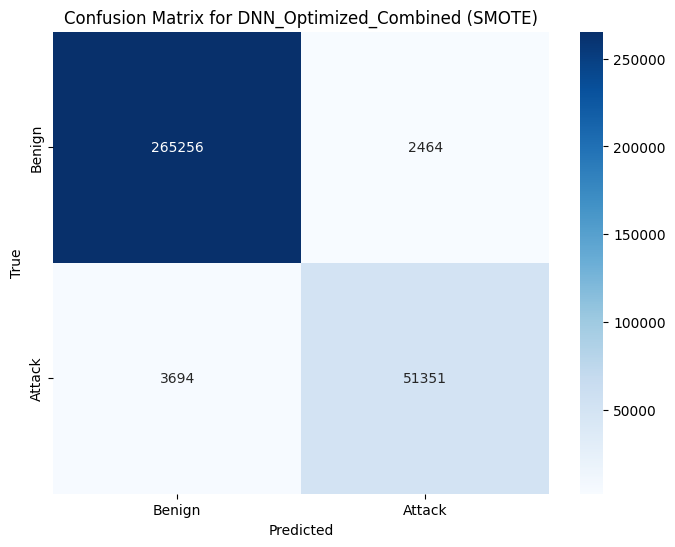

Metrics by Label (SMOTE):
                       Label  Accuracy Method
0                     Benign  0.990796  SMOTE
1     DDoS attacks-LOIC-HTTP  0.996619  SMOTE
2           DDOS attack-HOIC  0.999709  SMOTE
3             SSH-Bruteforce  0.961620  SMOTE
4                        Bot  0.997740  SMOTE
5              Infilteration  0.025392  SMOTE
6           DoS attacks-Hulk  0.965339  SMOTE
7             FTP-BruteForce  1.000000  SMOTE
8   DoS attacks-SlowHTTPTest  1.000000  SMOTE
9      DoS attacks-GoldenEye  0.992883  SMOTE
10     DoS attacks-Slowloris  0.734597  SMOTE
11      DDOS attack-LOIC-UDP  1.000000  SMOTE
12          Brute Force -Web  0.909091  SMOTE
13          Brute Force -XSS  1.000000  SMOTE
14             SQL Injection  0.500000  SMOTE


In [14]:
import keras_tuner as kt
from keras.models import Sequential
from keras.layers import Dense, Input, Dropout
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

# Define the combined model builder function
def build_combined_model(hp):
    model = Sequential()
    model.add(Input(shape=(X_smote_train.shape[1],)))

    # Choose the number of layers (either 3 or 4)
    num_layers = hp.Choice('num_layers', values=[3, 4])
    
    # Same dropout rate for all layers
    dropout_rate = hp.Choice('dropout', values=[0.0, 0.1, 0.2, 0.3, 0.4, 0.5])

    if num_layers == 3:
        # Fixed units for 3 layers: 128, 64, 32
        units_per_layer = [128, 64, 32]
    else:
        # Fixed units for 4 layers: 256, 128, 64, 32
        units_per_layer = [256, 128, 64, 32]
    
    for i in range(num_layers):
        model.add(Dense(units=units_per_layer[i], activation='relu'))
        model.add(Dropout(rate=dropout_rate))
    
    model.add(Dense(1, activation='sigmoid'))
    
    # Use Adam optimizer with different learning rates
    optimizer = Adam(learning_rate=hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4]))
    
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Initialize the tuner for the combined model
tuner_combined = kt.Hyperband(build_combined_model,
                              objective='accuracy',
                              max_epochs=20,
                              factor=3,
                              directory='optimization_2018',
                              project_name='DNN_combined_fixed_dropout')

# Early stopping callback
stop_early = EarlyStopping(monitor='accuracy', patience=5)

# Perform hyperparameter search for the combined model
tuner_combined.search(scaler_smote.transform(X_smote_train), Y_smote_train.is_attack, 
                      epochs=50, validation_split=0.2, callbacks=[stop_early])

# Get the optimal hyperparameters
best_hps_combined = tuner_combined.get_best_hyperparameters(num_trials=1)[0]
print(f"The optimal hyperparameters are: {best_hps_combined.values}")

# Build and train the model with the optimal hyperparameters
model_combined = tuner_combined.hypermodel.build(best_hps_combined)
history_combined = model_combined.fit(scaler_smote.transform(X_smote_train), Y_smote_train.is_attack, 
                                      epochs=50, validation_split=0.2, callbacks=[stop_early])

# Evaluate and save the model
metrics["DNN_Optimized_Combined"] = test_metrics_DL("DNN_Optimized_Combined", model_combined, scaler_smote, X_test, Y_test, reshape=False)
save_model(model_combined, "DNN_SMOTE_Optimized_Combined")

## Optimized CNN


Reloading Tuner from optimization_2018\cnn_tuning_fixed_units_filters\tuner0.json
The optimal hyperparameters are: {'kernel_size': 5, 'dropout': 0.0, 'learning_rate': 0.001, 'tuner/epochs': 20, 'tuner/initial_epoch': 7, 'tuner/bracket': 1, 'tuner/round': 1, 'tuner/trial_id': '0019'}
Epoch 1/50
61772/61772 ━━━━━━━━━━━━━━━━━━━━ 45s 710us/step - accuracy: 0.9577 - loss: 0.1305 - val_accuracy: 0.5686 - val_loss: 1.8746
Epoch 2/50
61772/61772 ━━━━━━━━━━━━━━━━━━━━ 43s 692us/step - accuracy: 0.9774 - loss: 0.0799 - val_accuracy: 0.5838 - val_loss: 1.6010
Epoch 3/50
61772/61772 ━━━━━━━━━━━━━━━━━━━━ 43s 692us/step - accuracy: 0.9801 - loss: 0.0733 - val_accuracy: 0.5634 - val_loss: 1.7545
Epoch 4/50
61772/61772 ━━━━━━━━━━━━━━━━━━━━ 43s 688us/step - accuracy: 0.9818 - loss: 0.0682 - val_accuracy: 0.6113 - val_loss: 1.5114
Epoch 5/50
61772/61772 ━━━━━━━━━━━━━━━━━━━━ 43s 696us/step - accuracy: 0.9831 - loss: 0.0649 - val_accuracy: 0.4765 - val_loss: 1.9252
Epoch 6/50
61772/61772 ━━━━━━━━━━━━━━━━━

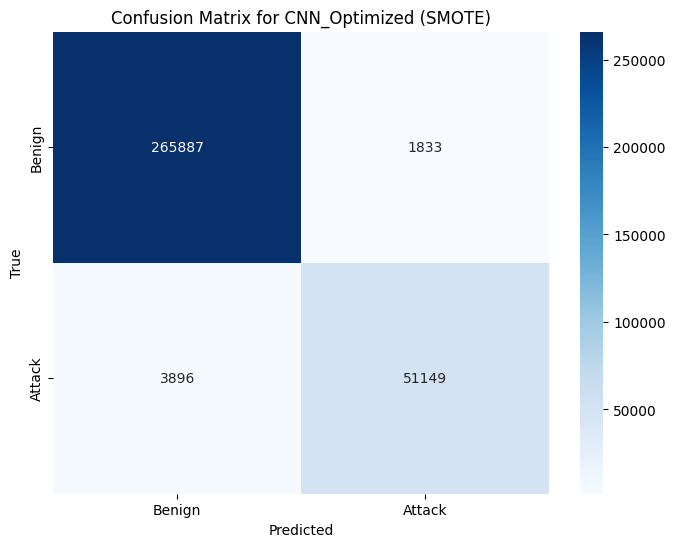

Metrics by Label (SMOTE):
                       Label  Accuracy Method
0                     Benign  0.993153  SMOTE
1     DDoS attacks-LOIC-HTTP  0.997833  SMOTE
2           DDOS attack-HOIC  0.999855  SMOTE
3             SSH-Bruteforce  0.961620  SMOTE
4                        Bot  0.940195  SMOTE
5              Infilteration  0.033542  SMOTE
6           DoS attacks-Hulk  0.973869  SMOTE
7             FTP-BruteForce  1.000000  SMOTE
8   DoS attacks-SlowHTTPTest  1.000000  SMOTE
9      DoS attacks-GoldenEye  0.998814  SMOTE
10     DoS attacks-Slowloris  0.744076  SMOTE
11      DDOS attack-LOIC-UDP  1.000000  SMOTE
12          Brute Force -Web  1.000000  SMOTE
13          Brute Force -XSS  1.000000  SMOTE
14             SQL Injection  0.500000  SMOTE


In [15]:
import keras_tuner as kt
from keras.models import Sequential
from keras.layers import Conv1D, Flatten, Dense, Input, Dropout
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
import tensorflow as tf

# Ensure TensorFlow compatibility
tf.compat.v1.reset_default_graph()

# Define the model builder function for CNN with fixed units and filters, and reduced dropout range
def build_cnn_model(hp):
    model = Sequential()
    model.add(Input(shape=(X_smote_train.shape[1], 1)))
    
    # Fixed number of filters in the Conv1D layer
    model.add(Conv1D(filters=64,
                     kernel_size=hp.Int('kernel_size', min_value=2, max_value=5, step=1),
                     activation='relu'))
    
    # Flatten layer
    model.add(Flatten())
    
    # Fully connected layer with fixed units
    model.add(Dense(units=64, activation='relu'))
    
    # Dropout layer with reduced range
    model.add(Dropout(rate=hp.Choice('dropout', values=[0.0, 0.2, 0.4])))

    model.add(Dense(1, activation='sigmoid'))
    
    # Adam optimizer with different learning rates
    optimizer = Adam(learning_rate=hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4]))
    
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Initialize the tuner
tuner = kt.Hyperband(build_cnn_model,
                     objective='accuracy',
                     max_epochs=20,
                     factor=3,
                     directory='optimization_2018',
                     project_name='cnn_tuning_fixed_units_filters')

# Early stopping callback
stop_early = EarlyStopping(monitor='accuracy', patience=5)

# Perform hyperparameter search
tuner.search(scaler_smote.transform(X_smote_train).reshape(-1, X_smote_train.shape[1], 1), 
             Y_smote_train.is_attack, 
             epochs=50, 
             validation_split=0.2, 
             callbacks=[stop_early])

# Get the optimal hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"The optimal hyperparameters are: {best_hps.values}")

# Build the model with the optimal hyperparameters and train it
model = tuner.hypermodel.build(best_hps)
history = model.fit(scaler_smote.transform(X_smote_train).reshape(-1, X_smote_train.shape[1], 1), 
                    Y_smote_train.is_attack, 
                    epochs=50, 
                    validation_split=0.2, 
                    callbacks=[stop_early])

# Evaluate and save the model
metrics["CNN_Optimized"] = test_metrics_DL("CNN_Optimized", model, scaler_smote, X_test, Y_test, reshape=False)
save_model(model, "CNN_SMOTE_Optimized")

## RNN Optimized

In [ ]:
import keras_tuner as kt
from keras.models import Sequential
from keras.layers import LSTM, Dense, Input, Dropout
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

# Define the updated balanced model builder function for RNN
def build_updated_rnn_model(hp):
    model = Sequential()
    model.add(Input(shape=(X_smote_train.shape[1], 1)))

    # Tune the number of units in the LSTM layer
    model.add(LSTM(units=hp.Int('units', min_value=64, max_value=128, step=32)))
    
    # Fully connected layer
    model.add(Dense(units=hp.Int('dense_units', min_value=32, max_value=64, step=32), activation='relu'))

    # Dropout layer with a range from 0 to 0.5
    model.add(Dropout(rate=hp.Float('dropout', min_value=0.0, max_value=0.4, step=0.2)))

    # Output layer
    model.add(Dense(1, activation='sigmoid'))
    
    # Adam optimizer with the original set of learning rates
    optimizer = Adam(learning_rate=hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4]))
    
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Initialize the tuner
tuner = kt.Hyperband(build_updated_rnn_model,
                     objective='accuracy',
                     max_epochs=20,
                     factor=3,
                     directory='optimization_2018',
                     project_name='updated_rnn_tuning')

# Early stopping callback
stop_early = EarlyStopping(monitor='accuracy', patience=5)

# Perform hyperparameter search
tuner.search(scaler_smote.transform(X_smote_train).reshape(-1, X_smote_train.shape[1], 1), 
             Y_smote_train.is_attack, 
             epochs=50, 
             validation_split=0.2, 
             callbacks=[stop_early])

# Get the optimal hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"The optimal hyperparameters are: {best_hps.values}")

# Build the model with the optimal hyperparameters and train it
model = tuner.hypermodel.build(best_hps)
history = model.fit(scaler_smote.transform(X_smote_train).reshape(-1, X_smote_train.shape[1], 1), 
                    Y_smote_train.is_attack, 
                    epochs=50, 
                    validation_split=0.2, 
                    callbacks=[stop_early])

# Evaluate and save the model
metrics["RNN_Optimized"] = test_metrics_DL("RNN_Optimized", model, scaler_smote, X_test, Y_test, reshape=False)
save_model(model, "RNN_SMOTE_Optimized")


Trial 17 Complete [00h 50m 02s]

Best accuracy So Far: 0.9890120029449463
Total elapsed time: 15h 05m 40s

Search: Running Trial #18

Value             |Best Value So Far |Hyperparameter
96                |96                |units
64                |64                |dense_units
0.2               |0.2               |dropout
0.001             |0.001             |learning_rate
20                |3                 |tuner/epochs
7                 |0                 |tuner/initial_epoch
2                 |2                 |tuner/bracket
2                 |0                 |tuner/round
0012              |None              |tuner/trial_id

Epoch 8/20


C:\Users\youss\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras_tuner\src\tuners\hyperband.py:435: UserWarning: Model 'sequential' had a build config, but the model cannot be built automatically in `build_from_config(config)`. You should implement `def build_from_config(self, config)`, and you might also want to implement the method  that generates the config at saving time, `def get_build_config(self)`. The method `build_from_config()` is meant to create the state of the model (i.e. its variables) upon deserialization.
  model.build_from_config(
C:\Users\youss\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\saving\saving_lib.py:396: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 16 variables. 
  trackable.load_own_variables(weights_store.get(inner_path))


48437/61772 ━━━━━━━━━━━━━━━━━━━━ 1:01 5ms/step - accuracy: 0.9844 - loss: 0.0592

## Optimized Autoencoder

In [ ]:
import keras_tuner as kt
from keras.models import Sequential
from keras.layers import Dense, Input, Dropout
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

# Define the model builder function for Autoencoder
def build_autoencoder_model_with_threshold(hp):
    model = Sequential()
    model.add(Input(shape=(benign_data.shape[1],)))

    # Encoder
    model.add(Dense(units=hp.Int('units_1', min_value=32, max_value=128, step=32), activation='relu'))
    model.add(Dense(units=hp.Int('bottleneck', min_value=8, max_value=16, step=8), activation='relu'))
    
    # Decoder
    model.add(Dense(units=hp.Int('units_2', min_value=32, max_value=128, step=32), activation='relu'))
    
    # Reconstruct the input
    model.add(Dense(benign_data.shape[1], activation='sigmoid'))

    # Compile the model
    optimizer = Adam(learning_rate=hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4]))
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    
    return model

# Initialize the tuner
tuner = kt.Hyperband(build_autoencoder_model_with_threshold,
                     objective=kt.Objective("val_loss", direction="min"),
                     max_epochs=20,
                     factor=3,
                     directory='optimization_2018',
                     project_name='autoencoder_tuning_with_threshold')

# Early stopping callback
stop_early = EarlyStopping(monitor='val_loss', patience=5)

# Perform hyperparameter search, including threshold tuning
tuner.search(scaler_AE.transform(benign_data), scaler_AE.transform(benign_data), 
             epochs=50, validation_split=0.2, callbacks=[stop_early])

# Get the optimal hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"The optimal hyperparameters are: {best_hps.values}")

# Build the model with the optimal hyperparameters and train it
model = tuner.hypermodel.build(best_hps)
history = model.fit(scaler_AE.transform(benign_data), scaler_AE.transform(benign_data), 
                    epochs=50, validation_split=0.2, callbacks=[stop_early])

# Tune the threshold separately
optimal_threshold_percentile = best_hps.Int("threshold_percentile", min_value=80, max_value=99, step=1)
metrics["AE_Optimized"], metrics_by_label = test_metrics_AE(
    "AE_Optimized", model, scaler_AE, X_test, Y_test, threshold_percentile=optimal_threshold_percentile)

# Save the model
save_model(model, "AE_SMOTE_Optimized")